In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from torch.autograd import Variable

In [ ]:
BATCH_SIZE = 2680
TIME_STEP = 3
INPUT_SIZE = 33
LR = 1e-6

In [ ]:
x = pd.read_csv("drive/My Drive/Colab Notebooks/fiber_model_ook/3dbminput.csv", header=None, skiprows=50)
x = np.array(x)
x = x.reshape(2680, 3, 32)
# x = x.transpose([1,2,0])
x = np.insert(x, 32, values=20, axis=2)
x = torch.Tensor(x)
# x = torch.from_numpy(x)

In [4]:
y = pd.read_csv("drive/My Drive/Colab Notebooks/fiber_model_ook/3dbmoutput20.csv", header=None, skiprows=50)
y = np.array(y)
y = y.reshape(2680, 3, 32)
# y = y.transpose([1,2,0])
y = torch.Tensor(y)
# y = torch.from_numpy(y)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
x = x.to(device)
y = y.to(device)

In [ ]:
class RNN(nn.Module):
  def __init__(self):
    super(RNN, self).__init__()
    self.rnn = nn.LSTM(
        input_size=INPUT_SIZE,
        hidden_size=64,
        num_layers=3,
        batch_first=True,
        bidirectional=True
    )
    self.out = nn.Linear(128,32)

  def forward(self, x):
    # x shape (batch, time_step, input_size)
    # r_out shape (batch, time_step, output_size)
    # h_n shape (n_layers, batch, hidden_size)
    # h_c shape (n_layers, batch, hidden_size)
    r_out, (h_n, h_c) = self.rnn(x, None)
    #print(r_out.shape)

    # choose r_out at the last time step
    out = self.out(r_out)
    #print(out.shape)

    return out

In [ ]:
rnn = RNN()
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.MSELoss()
rnn.cuda()

RNN(
  (rnn): LSTM(33, 64, num_layers=3, batch_first=True, bidirectional=True)
  (out): Linear(in_features=128, out_features=32, bias=True)
)

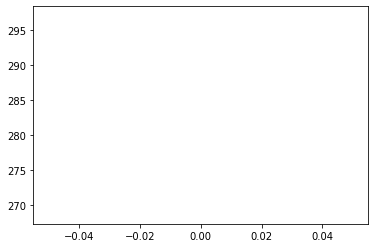

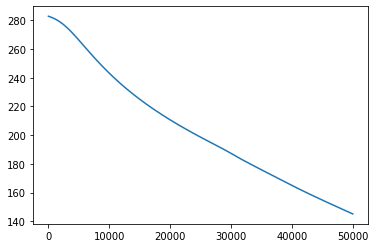

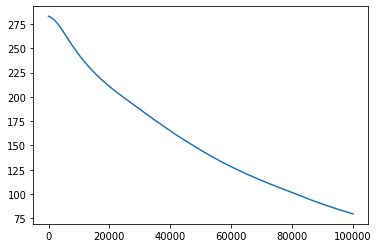

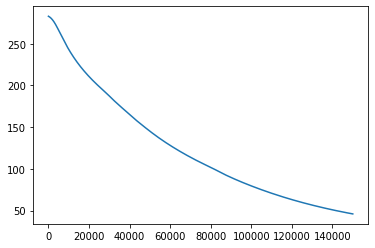

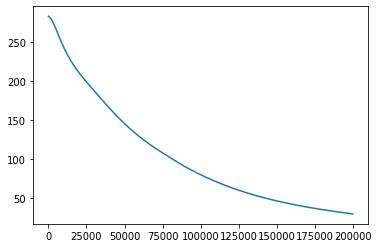

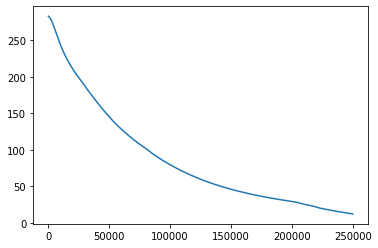

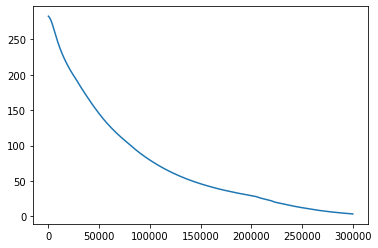

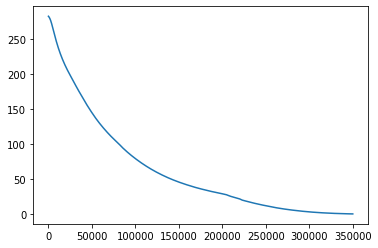

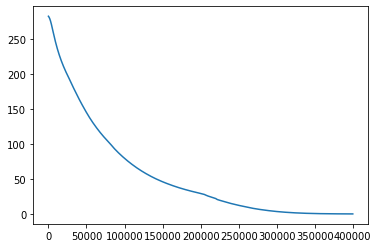

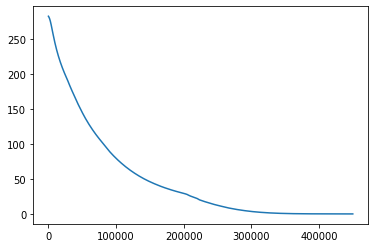

In [ ]:
# training and testing
loss_all = []
for i in range(500000):
  # var_x = Variable(x)
  # var_y = Variable(y)
  # var_x = var_x.to(device)
  # var_y = var_y.to(device)
  out = rnn(x)
  loss = loss_func(out, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  loss_all.append(loss)
  if i%50000 == 0:
    plt.plot(loss_all)
    plt.show()

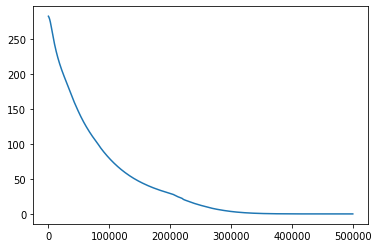

In [ ]:
plt.plot(loss_all)

In [ ]:
min(loss_all)

tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)

In [ ]:
x.shape

torch.Size([2680, 3, 33])

In [ ]:
out

tensor([[[2.5474e+01, 2.5795e+01, 2.6074e+01,  ..., 1.9734e+00,
          1.5620e+00, 1.2508e+00],
         [1.0424e+00, 9.2774e-01, 8.7441e-01,  ..., 2.3618e+01,
          2.4258e+01, 2.4738e+01],
         [2.5089e+01, 2.5328e+01, 2.5466e+01,  ..., 2.5262e+01,
          2.5310e+01, 2.5372e+01]],

        [[2.5650e+01, 2.5785e+01, 2.5900e+01,  ..., 2.2147e+00,
          1.7250e+00, 1.3166e+00],
         [9.9786e-01, 7.4266e-01, 5.4817e-01,  ..., 2.4708e-02,
          2.3421e-02, 2.3918e-02],
         [2.7606e-02, 2.8411e-02, 2.5610e-02,  ..., 1.4989e-02,
          1.9823e-02, 2.6234e-02]],

        [[2.3289e-02, 2.7896e-02, 2.7076e-02,  ..., 2.5881e-02,
          2.6208e-02, 2.4468e-02],
         [2.6133e-02, 2.2990e-02, 2.1828e-02,  ..., 2.4868e-02,
          2.6106e-02, 2.8159e-02],
         [2.5245e-02, 2.4225e-02, 2.4822e-02,  ..., 1.7022e-02,
          1.9935e-02, 2.4809e-02]],

        ...,

        [[2.5589e+01, 2.5779e+01, 2.5896e+01,  ..., 1.9446e+00,
          1.5133e+00, 1.2

In [5]:
y

tensor([[[2.5451e+01, 2.5826e+01, 2.6098e+01,  ..., 1.9725e+00,
          1.5470e+00, 1.2459e+00],
         [1.0491e+00, 9.3446e-01, 8.8131e-01,  ..., 2.3629e+01,
          2.4259e+01, 2.4743e+01],
         [2.5094e+01, 2.5329e+01, 2.5467e+01,  ..., 2.5296e+01,
          2.5395e+01, 2.5516e+01]],

        [[2.5650e+01, 2.5784e+01, 2.5902e+01,  ..., 2.2142e+00,
          1.7208e+00, 1.3188e+00],
         [9.9744e-01, 7.4502e-01, 5.5011e-01,  ..., 2.3296e-02,
          2.4435e-02, 2.5417e-02],
         [2.6235e-02, 2.6899e-02, 2.7412e-02,  ..., 2.4939e-02,
          2.4926e-02, 2.4920e-02]],

        [[2.4925e-02, 2.4932e-02, 2.4944e-02,  ..., 2.5233e-02,
          2.5239e-02, 2.5227e-02],
         [2.5216e-02, 2.5226e-02, 2.5236e-02,  ..., 2.5364e-02,
          2.5411e-02, 2.5330e-02],
         [2.5142e-02, 2.4946e-02, 2.4863e-02,  ..., 6.2767e-03,
          1.3758e-02, 2.8112e-02]],

        ...,

        [[2.5649e+01, 2.5779e+01, 2.5896e+01,  ..., 1.9433e+00,
          1.5278e+00, 1.2